In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\1100634\Downloads\QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


**Date is an object convert to datetime format**

In [5]:
df["DATE"] = pd.to_datetime(df["DATE"])

#Extarct yearmonth

df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [7]:
#Define the calculations

grouped_df = df.groupby(['STORE_NBR','YEARMONTH'])
total_sales = grouped_df['TOT_SALES'].sum()
num_customers = grouped_df['LYLTY_CARD_NBR'].nunique()
num_trans_per_customer = grouped_df['TXN_ID'].size()/num_customers
chips_per_customer = grouped_df['PROD_QTY'].sum()/grouped_df['TXN_ID'].size()
avg_price_per_unit = total_sales/grouped_df['PROD_QTY'].sum()


metrics_array = [total_sales, num_customers, num_trans_per_customer, chips_per_customer, avg_price_per_unit]
metrics_df = pd.concat(metrics_array, axis=1)

metrics_df.columns = ['TOTAL_SALES', 'NUM_CUSTOMERS', 'NUM_TRANSACTIONS_PER_CUSTOMER', 'NUM_CHIPS_PER_TRANSACTION', 'AVG_PRICE_PER_UNIT']
metrics_df = metrics_df.reset_index()
metrics_df

,STORE_NBR,YEARMONTH,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TRANSACTION,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [14]:
month_counts = metrics_df.groupby('STORE_NBR')['YEARMONTH'].nunique().reset_index()
stores_fullobs = month_counts[month_counts['YEARMONTH'] == 12]['STORE_NBR']
pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

In [16]:
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics['YEARMONTH'] < 201912]
pretrial_metrics

,STORE_NBR,YEARMONTH,TOTAL_SALES,NUM_CUSTOMERS,NUM_TRANSACTIONS_PER_CUSTOMER,NUM_CHIPS_PER_TRANSACTION,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [23]:
def corr_calc(trial, metric_col,pretrial_metrics):
    trial_stores = [77,86,88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]
    
    trial_values = pretrial_metrics[pretrial_metrics['STORE_NBR'] == trial][metric_col].reset_index()
    corr_table = pd.DataFrame(columns=['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
    
    for control in control_stores:
        control_values =pretrial_metrics[pretrial_metrics['STORE_NBR'] == control][metric_col].reset_index()
        corr_row = pd.DataFrame(columns=['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
        corr_row['YEARMONTH'] = list(pretrial_metrics.loc[pretrial_metrics['STORE_NBR'] == control]['YEARMONTH'])
        corr_row['trial_store'] = trial
        corr_row['control_store']= control
        corr_row['correlation'] = control_values.corrwith(trial_values, axis=1)
        corr_table = pd.concat([corr_table, corr_row])
    return(corr_table)

In [26]:
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = corr_calc(store, ['TOTAL_SALES', 'NUM_CUSTOMERS', 'NUM_TRANSACTIONS_PER_CUSTOMER', 'NUM_CHIPS_PER_TRANSACTION', 'AVG_PRICE_PER_UNIT'], pretrial_metrics)
    corr_table = pd.concat([corr_table, corr_section])

In [27]:
corr_table

,YEARMONTH,trial_store,control_store,correlation
0,201807,77,1,0.070544
1,201808,77,1,0.027332
2,201809,77,1,0.002472
3,201810,77,1,-0.019991
4,201811,77,1,0.030094
...,...,...,...,...
7,201902,88,272,0.577384
8,201903,88,272,0.553713
9,201904,88,272,0.567352
10,201905,88,272,0.580163


In [28]:
def calculate_magnitude_distance(trial, metric_col, input_table = pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]
    dist_table = pd.DataFrame()

    for control in control_stores:
        dist_row = pd.DataFrame()

        dist_row = abs(input_table[input_table["STORE_NBR"] == trial].reset_index()[metric_col]\
                        - input_table[input_table["STORE_NBR"] == control].reset_index()[metric_col])
        dist_row.insert(0,'YEARMONTH', list(input_table.loc[input_table.STORE_NBR == trial]["YEARMONTH"]))
        dist_row.insert(1,'trial_store', trial)
        dist_row.insert(2,'control_store', control)
        dist_table = pd.concat([dist_table, dist_row])

    for col in metric_col:
        maxdist = dist_table[col].max()
        mindist = dist_table[col].min()
        dist_table[col] = 1-(dist_table[col] - mindist)/(maxdist-mindist)

    dist_table['mag_measure'] = dist_table[metric_col].mean(axis=1)
    return (dist_table)

In [33]:
def calculate_correlation_distance_score (trial, metric_col, input_table=pretrial_metrics):
    corr_vals = corr_calc(trial, metric_col, input_table)
    mag_vals = calculate_magnitude_distance(trial, metric_col, input_table)
    mag_vals = mag_vals.drop(metric_col, axis=1)

    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["YEARMONTH", "trial_store", "control_store"])

    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()

    corr_weight = 0.5
    avg_corrmag['combined_score'] = corr_weight*avg_corrmag['correlation'] + (1-corr_weight)*avg_corrmag['mag_measure']

    return(avg_corrmag)

In [31]:
def find_highest_score(trial):
    scores_tot_sales = calculate_correlation_distance_score (trial, ['TOTAL_SALES'])
    scores_n_cust = calculate_correlation_distance_score(trial, ['NUM_CUSTOMERS'])

    scores_control = pd.DataFrame()
    scores_control['control_store'] = scores_tot_sales.control_store

    scores_control['correlation'] = 0.5*scores_tot_sales.correlation + 0.5*scores_n_cust.correlation
    scores_control['mag_measure'] = 0.5*scores_tot_sales.mag_measure + 0.5*scores_n_cust.mag_measure
    scores_control['scores'] = 0.5*scores_tot_sales.combined_score + 0.5*scores_n_cust.combined_score
    return(scores_control.sort_values(by = 'scores', ascending = False).reset_index(drop = True).head(5))

In [34]:
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highest_score(trial))
    print()

Trial store:  77
   control_store  correlation  mag_measure    scores
0            233          1.0     0.973992  0.986996
1             41          1.0     0.971117  0.985558
2            188          1.0     0.964026  0.982013
3             53          1.0     0.963668  0.981834
4             46          1.0     0.963402  0.981701

Trial store:  86
   control_store  correlation  mag_measure    scores
0            155     0.916667     0.958582  0.937624
1            229     0.916667     0.955519  0.936093
2            109     0.916667     0.943437  0.930052
3            227     0.916667     0.942881  0.929774
4            225     0.916667     0.940506  0.928586

Trial store:  88
   control_store  correlation  mag_measure    scores
0             40          1.0     0.933746  0.966873
1             26          1.0     0.906031  0.953016
2             58          1.0     0.900580  0.950290
3             81          1.0     0.892550  0.946275
4             72          1.0     0.889848  0.

In [38]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == trial][['YEARMONTH', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == control][['YEARMONTH', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})

    other_stores = pretrial_metrics.loc[(pretrial_metrics.STORE_NBR != 77)][['YEARMONTH', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pretrial_metrics.STORE_NBR != 233)]
    plot_other = other_stores.groupby('YEARMONTH')[metric_col].mean()

    ax = control_plot.plot.line(x = "YEARMONTH", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "YEARMONTH", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels, rotation=45)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)

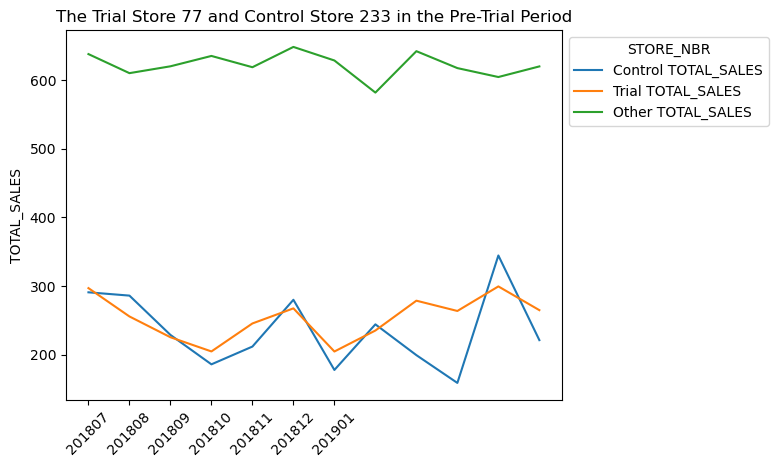

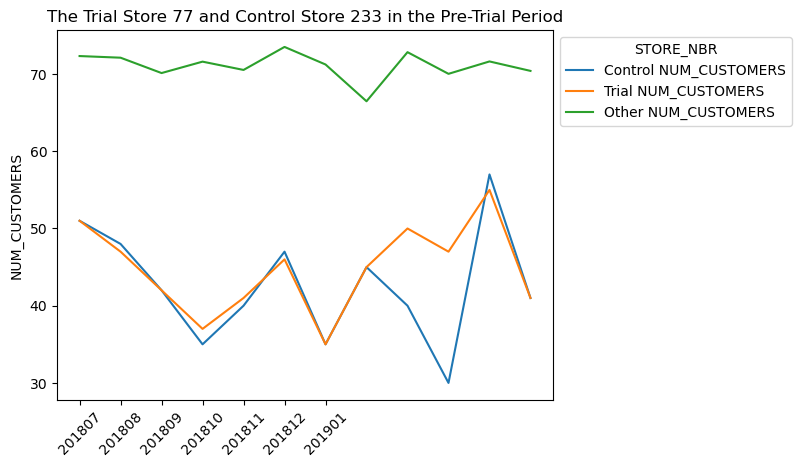

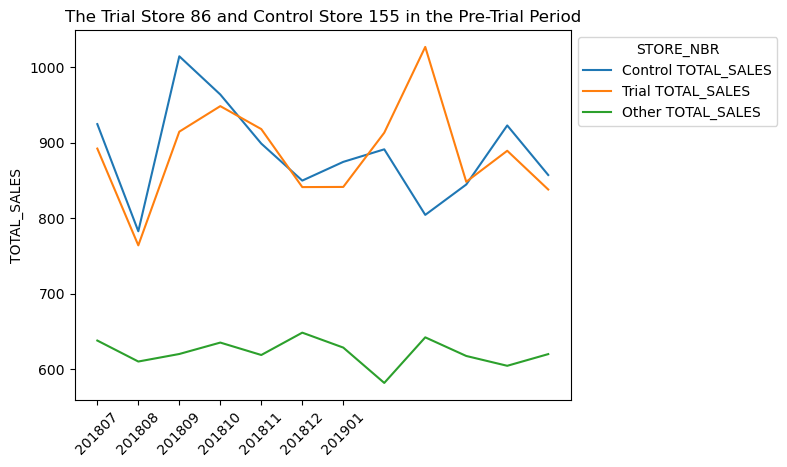

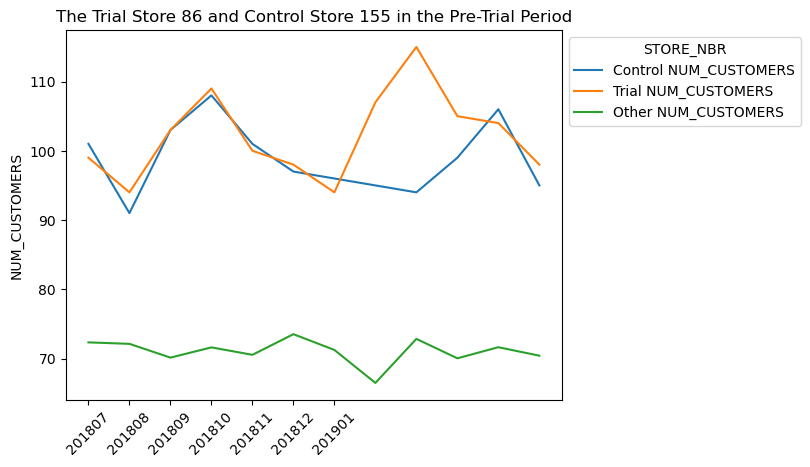

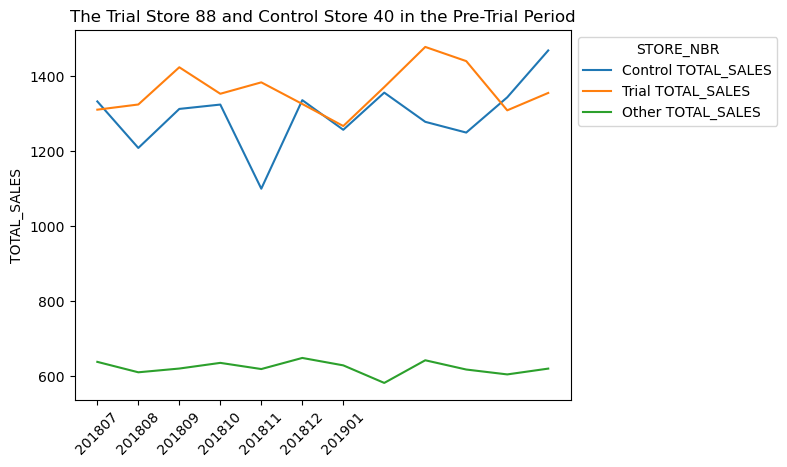

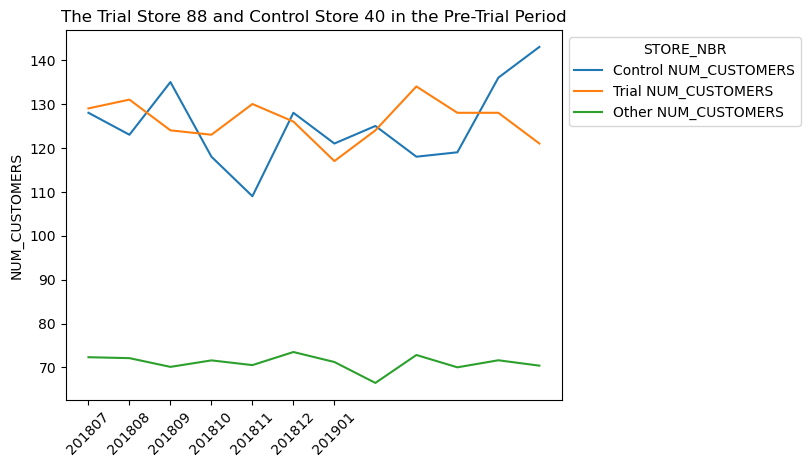

In [39]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['TOTAL_SALES', 'NUM_CUSTOMERS']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

In [40]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['TOTAL_SALES'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['TOTAL_SALES'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['TOTAL_SALES'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['TOTAL_SALES'].sum()

In [41]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control233.TOTAL_SALES *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control155.TOTAL_SALES *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']]
scaled_control40.TOTAL_SALES *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'TOTAL_SALES':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'})
scaledsales_control_trial = scaledsales_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'TOTAL_SALES']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialsales_trial = trialsales[(trialsales.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [42]:
# Percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'TOTAL_SALES']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,312.613817,77,296.8,-0.051898
1,233,201808,307.451979,77,255.5,-0.184570
2,233,201809,245.832537,77,225.2,-0.087606
3,233,201810,199.698610,77,204.5,0.023758
4,233,201811,227.551028,77,245.3,0.075072


In [43]:
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()
dof = 6

for stores in storepair:
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['sales_percent_diff'].agg('std')
    mean =  pretrial['sales_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['sales_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()

print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.717624340180979
201903  :  3.0459736050037596
201904  :  4.735744461299656

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  1.4140306688633362
201903  :  7.1395245929265165
201904  :  0.8865690146878357

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.5481696106278142
201903  :  1.009161833484289
201904  :  0.9711691661108331

95th percentile value: 1.9431802803927816


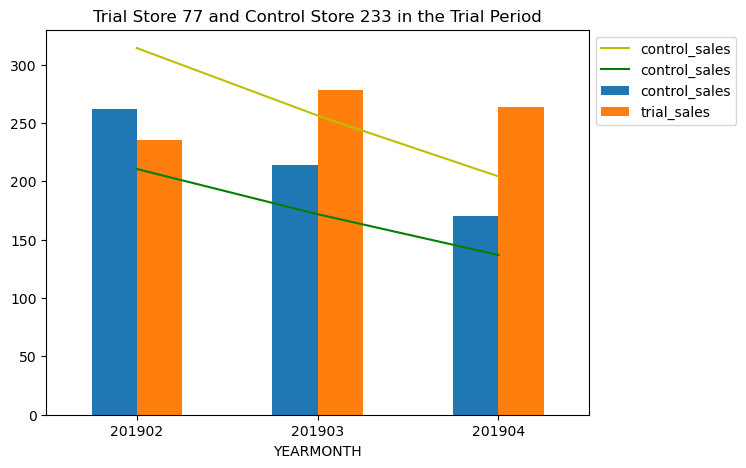

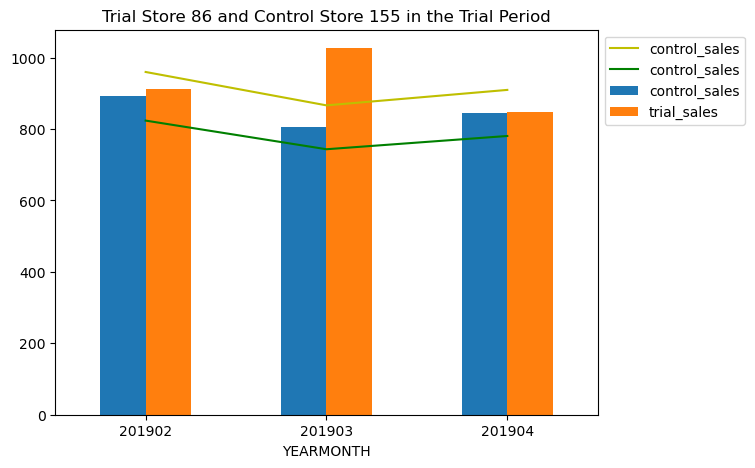

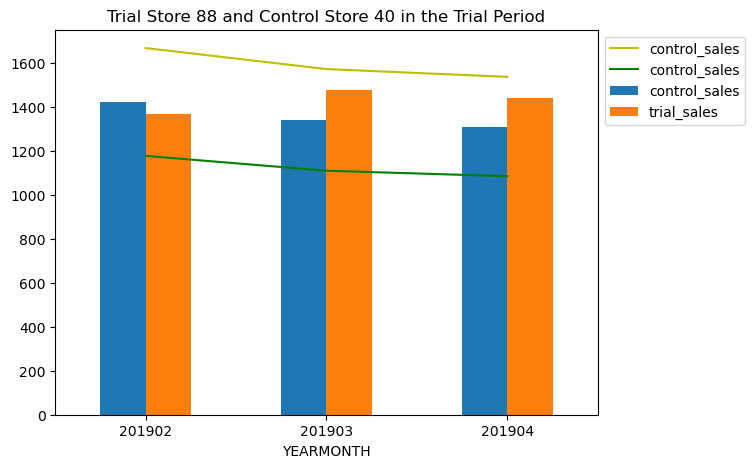

In [44]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]

    # Bar chart of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["YEARMONTH", "control_sales"]].merge(plot_trial[["YEARMONTH", "trial_sales"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)

    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

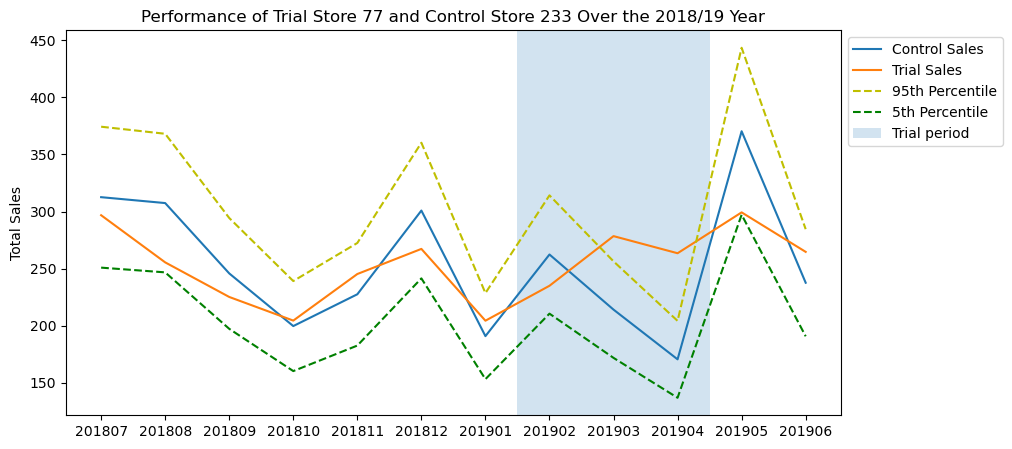

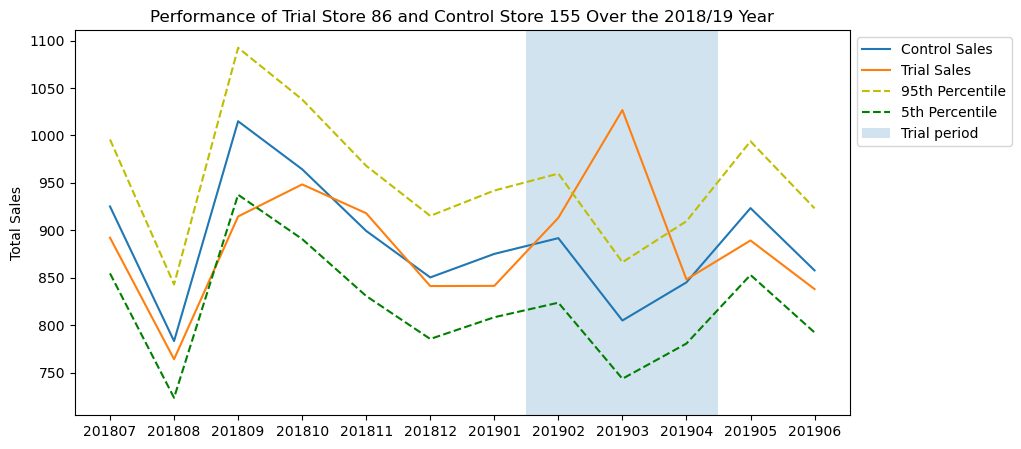

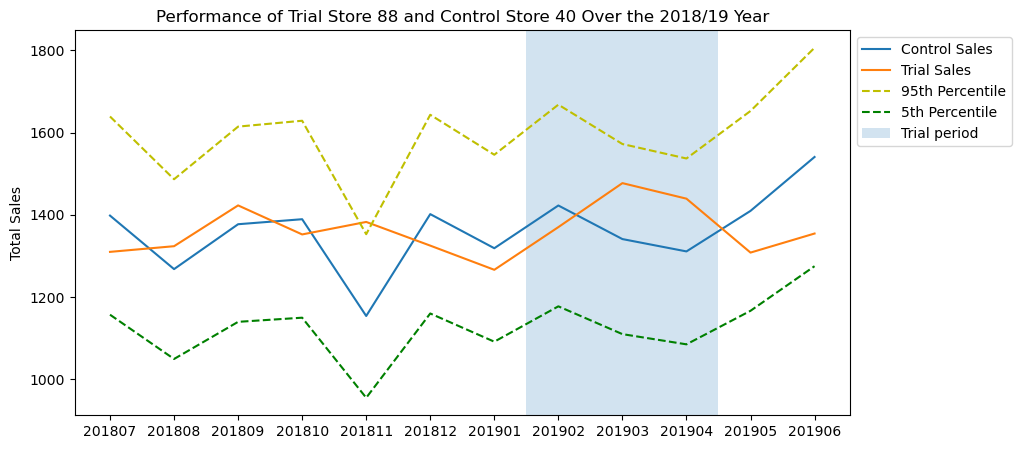

In [45]:
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]

    # Line graph of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

In [47]:
#Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['NUM_CUSTOMERS'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['NUM_CUSTOMERS'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['NUM_CUSTOMERS'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['NUM_CUSTOMERS'].sum()

In [48]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control233.NUM_CUSTOMERS *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control155.NUM_CUSTOMERS *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']]
scaled_control40.NUM_CUSTOMERS *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'n_cust':'scaled_n_cust', 'STORE_NBR': 'CONTROL_NBR'})
# Get the trial period of scaled control stores
scaledncust_control_trial = scaledncust_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialncust = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'NUM_CUSTOMERS']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialncust_trial = trialncust[(trialncust.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [49]:
# Percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'NUM_CUSTOMERS']]
percentdiff = percentdiff.rename(columns = {'NUM_CUSTOMERS' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,53.594912,77,51,-0.049618
1,233,201808,50.442270,77,47,-0.070653
2,233,201809,44.136986,77,42,-0.049618
3,233,201810,36.780822,77,37,0.005941
4,233,201811,42.035225,77,41,-0.024935


In [50]:
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()
dof = 6

for stores in storepair:
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['cust_percent_diff'].agg('std')
    mean =  pretrial['cust_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['cust_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()

print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.19906927444165426
201903  :  8.027475669961097
201904  :  16.191901763760665

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  6.226119123497383
201903  :  10.54273904840202
201904  :  3.0775232882842287

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.3591566949497693
201903  :  1.2575438526556513
201904  :  0.6095245015214831

95th percentile value: 1.9431802803927816


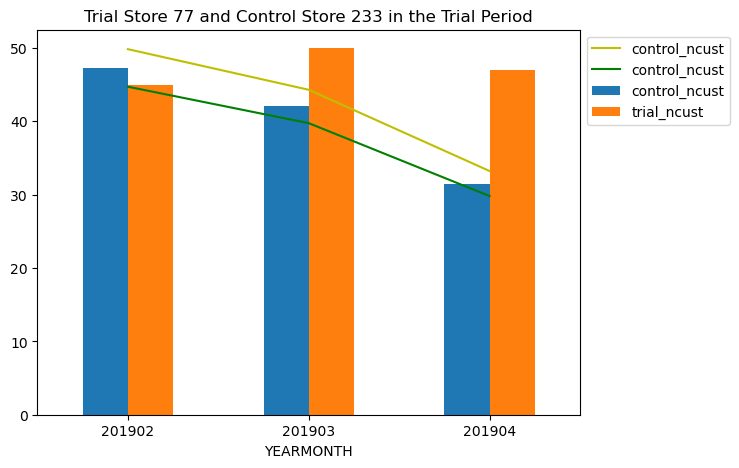

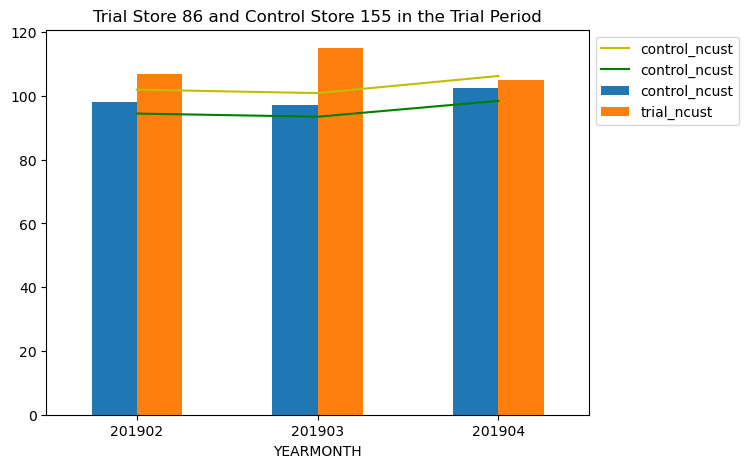

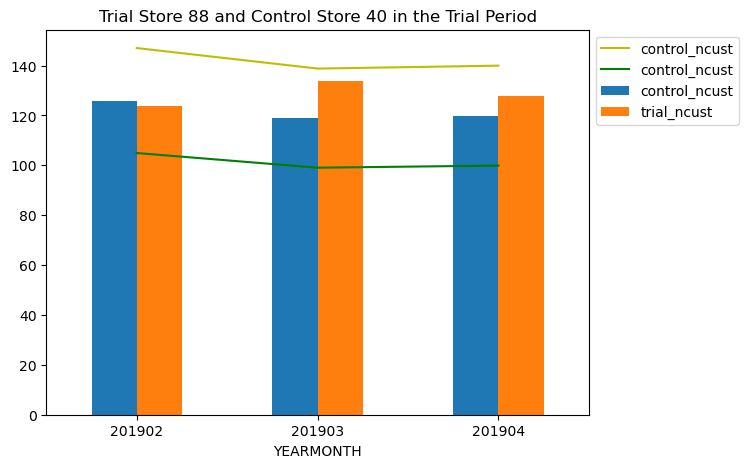

In [51]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["YEARMONTH", "control_ncust"]].merge(plot_trial[["YEARMONTH", "trial_ncust"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)

    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

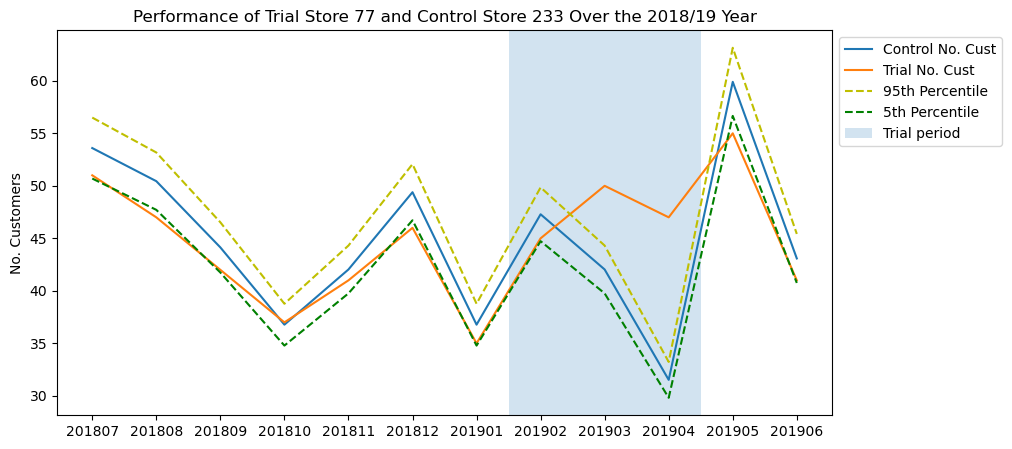

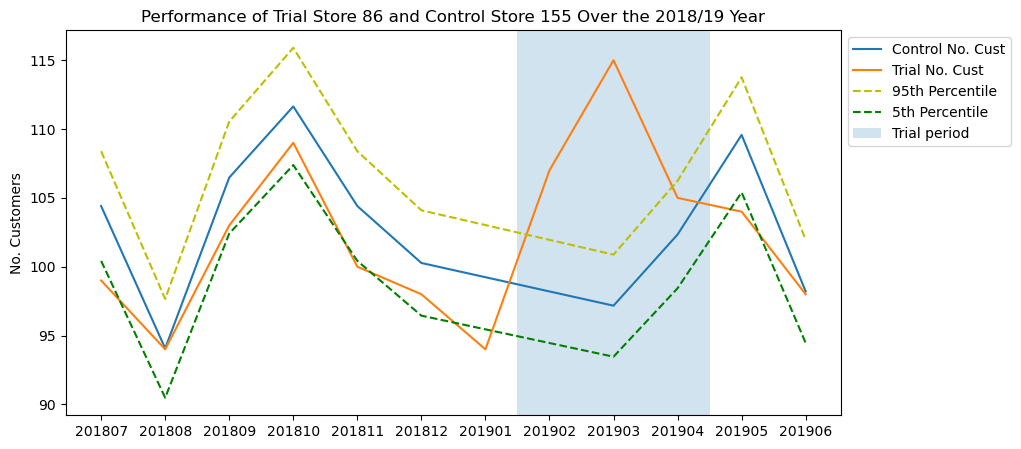

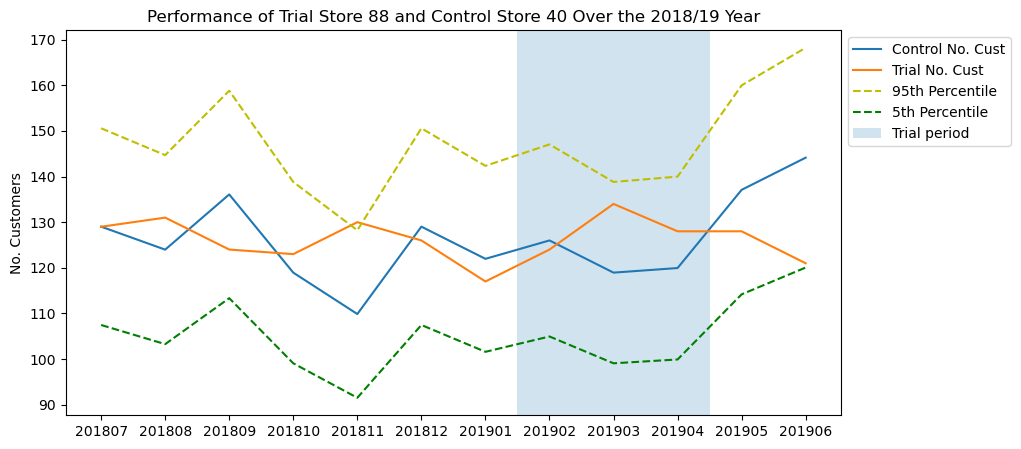

In [52]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair:
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')

    # Thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

The number of customers was significantly higher across all three months in stores 77 and 86. This suggests that the trial had a notable impact on increasing customer numbers in trial store 86. However, as observed, the increase in total sales for store 86 was not as statistically significant compared to store 77. It would be helpful to consult the Category Manager to determine if any special deals in the trial store may have led to lower prices, potentially influencing the results.

In contrast, for store 88, there does not appear to be a significant difference in customer numbers between the control and trial stores during the trial period.

Conclusion
In this task, we observed that trial stores 77 and 86 demonstrated a statistically significant difference in at least two of the three months during the trial period. However, this was not the case for store 88. It may be worth investigating whether the trial was implemented differently in store 88. Despite this, the trial has clearly shown a significant increase in sales overall.